In [28]:
import os
import numpy
from scipy.interpolate import interp1d

root = 'logs/'
algos = ['a2c', 'acktr', 'ppo']
games = ['beamrider', 'breakout', 'qbert']
numTrials = 5

def getLogFileNames(trialName):
    folderPath = root + trialName
    logFileNames = [fileName for fileName in os.listdir(folderPath) if 'monitor' in fileName]
    return folderPath, logFileNames
    
def getTrialStats(trialName):
    folderPath, logFileNames = getLogFileNames(trialName)
    #print(folderPath)
    
    logs = []
    for fileName in logFileNames:
        filePath = folderPath + '/' + fileName
        log_lines = []
        with open(filePath, 'r') as log_file:
            log_lines = log_file.readlines()
        logs.append(log_lines[2:])
        
    #print(logs[0][7])

    numProcesses = len(logs)
    timeSteps = []
    rewards = []
    for log in logs:
        curTimeStep = 0
        for line in log:
            lineParts = line.split(',')
            episodeReward = float(lineParts[0])
            episodeSteps = int(lineParts[1])
            episodeTime = float(lineParts[2])
            curTimeStep += episodeSteps * numProcesses
            timeSteps.append(curTimeStep)
            rewards.append(episodeReward)

    return timeSteps, rewards

def standardize_times(times):
    startTime = times[0]
    endTime = times[-1]
    #numTimes = len(times)
    numTimes = 3000
    return numpy.linspace(startTime, endTime, numTimes)

def standardize_rewards(standardTimes, times, rewards):
    f = interp1d(times, rewards, kind='nearest')
    return f(standardTimes)

In [29]:
trialNames = []
for algo in algos:
    for game in games:
        for trialNum in range(1, numTrials + 1):
            trialStr = str(trialNum)
            trialName = algo + '_' + game + '_' + trialStr
            trialNames.append(trialName)

(3000,)
(3000,)
(3000,)


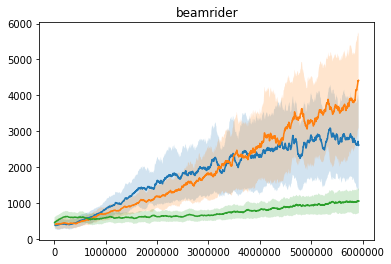

(3000,)
(3000,)
(3000,)


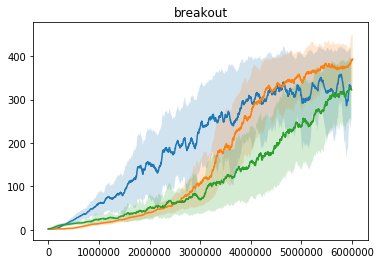

(3000,)
(3000,)
(3000,)


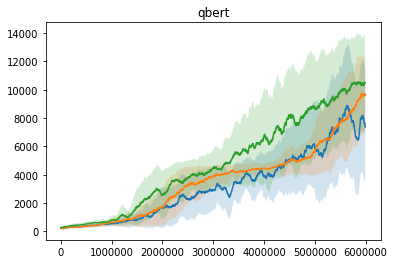

In [33]:
import matplotlib.pyplot as plt

def running_mean(x, N):
    cumsum = numpy.cumsum(numpy.insert(x, 0, 0)) 
    return (cumsum[N:] - cumsum[:-N]) / float(N)

for i, game in enumerate(games):
    plt.figure(i)    
    plt.title(game)
    for j, algo in enumerate(algos):
        standardRewardsList = []
        for trialNum in range(1, numTrials + 1):
            trialNumStr = str(trialNum)
            trialName = algo + '_' + game + '_' + trialNumStr
            times, rewards = getTrialStats(trialName)
            times, rewards = zip(*sorted(zip(times, rewards)))
            standardTimes = standardize_times(times)
            standardRewards = standardize_rewards(standardTimes, times, rewards)
            standardRewardsList.append(standardRewards)
        standardRewardsMat = numpy.array(standardRewardsList)
        rewardsMean = standardRewardsMat.mean(axis=0)
        print(rewardsMean.shape)
        rewardsError = standardRewardsMat.std(axis=0)
        smoothRewards = running_mean(rewardsMean, 50)
        smoothError = running_mean(rewardsError, 50)
        plt.plot(standardTimes[:-49], smoothRewards)
        plt.fill_between(standardTimes[:-49], smoothRewards - smoothError, smoothRewards + smoothError, alpha=0.2)

    plt.show()